# Midd South St. Battery Storage Case Study

Using the ISO local marginal price (LMP) data for October 9th for Vermont (`hourlylmp.csv`), calculate the financial profit South Street Storage can make by charging when electricity is cheap and discharging when electricity is expensive in both price peaks:

- using the Day Ahead LMP data
- using the Real Time LMP data

Question: why do you think there is such a huge difference between the two LMPs?

Assumption: start with fully empty storage and that charging and discharging speed is limited by the storages power rating (to fill 8MWh with 2MW - it takes 4 hours)

Data needed: Only the Vermont LMP on Oct 9th 2025. The other files linked below are in case you want to dig deeper or see data from different days.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("./hourlylmp.csv")
df2 = pd.read_csv("./hourlylmp1017.csv")

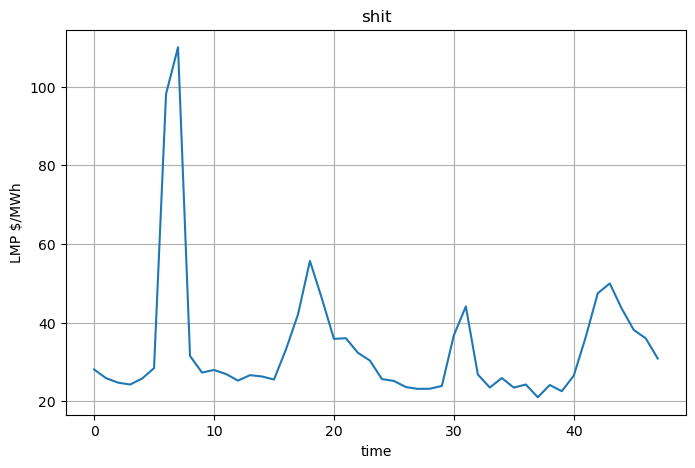

In [28]:
# day ahead only

# t = df['HourEnding']
t = range(0, 24)
lmp = df['LMP']

plt.figure(figsize=(8,5))
plt.plot(t, lmp)
plt.xlabel("time")
plt.ylabel("LMP $/MWh")
plt.title("shit")
plt.grid(True)
plt.show()

In [41]:
prices = df[df['Type'] == "DA"]['LMP']
# prices = df2['LMP']
cap = 8      # MWh
power = 2    # MW
eta_rt = 0.9
soc = 0 # state of charge MWh
profit = 0

charge_thresh = 30
discharge_thresh = 38

for p in prices:
    if p < charge_thresh and soc < cap:
        charge = min(power, cap - soc)
        cost = charge * p
        soc += charge * (eta_rt ** 0.5)
        profit -= cost
    elif p > discharge_thresh and soc > 0:
        discharge = min(power, soc)
        soc -= discharge
        revenue = discharge * (eta_rt ** 0.5) * p
        profit += revenue

print("Final soc:", round(soc, 2), "MWh")
print("Total profit: $", round(profit, 2))


Final soc: 2.0 MWh
Total profit: $ 334.77


In [40]:
# realtime prices

prices = df[df['Type'] == "RT"]['LMP']

cap = 8      # MWh
power = 2    # MW
eta_rt = 0.9
soc = 0 # state of charge MWh
profit = 0

charge_thresh = 30
discharge_thresh = 38

for p in prices:
    if p < charge_thresh and soc < cap:
        charge = min(power, cap - soc)
        cost = charge * p
        soc += charge * (eta_rt ** 0.5)
        profit -= cost
    elif p > discharge_thresh and soc > 0:
        discharge = min(power, soc)
        soc -= discharge
        revenue = discharge * (eta_rt ** 0.5) * p
        profit += revenue
    else:
        pass  # hold

print("Final SOC:", round(soc, 2), "MWh")
print("Total profit:", round(profit, 2), "$")


Final SOC: 0.0 MWh
Total profit: 162.36 $
